## Observations and Insights 

From the Code below we can observe the following:
* Capomulin Seems to have to best results based on the averages. The mean of the mice with tumors is the lowest, The variance of the tumors isnt very high either which impies hat the Mice on Capomulin did get worse
* Mice on Capomulin and Ramicane have more test taken implying that they live longer and there fore have more test done
* Capomulin and Ramicane are the best drugs in this data to treat the tumors in the mice

In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
df = mouse_metadata.merge(study_results, how='inner')
display(df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = pd.DataFrame({'Total Mice': [df['Mouse ID'].count()],
                          "Total Unique Mice": df['Mouse ID'].nunique()})
total_mice.set_index('Total Mice', inplace = True)
display(total_mice)


,Total Unique Mice
Total Mice,
1893,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = df[df.duplicated(subset =['Mouse ID', 'Timepoint'], keep='first')]
display(dups)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dups = df[df.duplicated(subset =['Mouse ID', 'Timepoint'], keep='first')]
display(dups.head(50))


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleaned = df[df['Mouse ID'] != 'g989']
display(df_cleaned)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_total_mice = pd.DataFrame({'Total Mice': [df_cleaned['Mouse ID'].count()],
                          "Total Unique Mice": df_cleaned['Mouse ID'].nunique()})
cleaned_total_mice.set_index('Total Mice', inplace = True)
display(cleaned_total_mice)



,Total Unique Mice
Total Mice,
1880,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_table = pd.DataFrame({'Mean of Tumor Volume (mm3)': df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
                             'Median of Tumor Volume (mm3)': df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
                             'Variance Of Tumor Volume(mm3)': df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
                             'Standard Deviation of Tumor Volume (mm3)': df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
                             'Standard Error of Tumor Volume (mm3)': df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()})
display(summary_table)



,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance Of Tumor Volume(mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg = df_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
display(agg)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

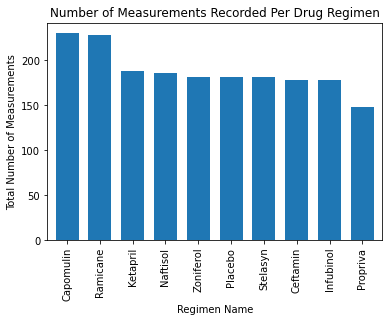

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

df_cleaned['Drug Regimen'].value_counts().plot(kind = 'bar', align='center', width=.7)
plt.xlabel('Regimen Name')
plt.ylabel('Total Number of Measurements')
plt.title('Number of Measurements Recorded Per Drug Regimen');

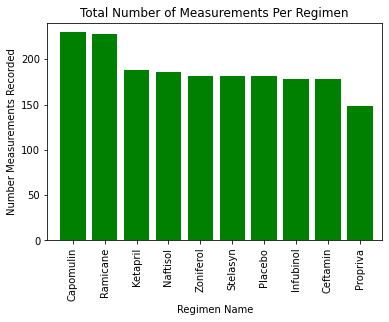

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
reg_count = df_cleaned['Drug Regimen'].value_counts()
x_axis = np.arange(len(df_cleaned['Drug Regimen'].value_counts()))
plt.bar(x_axis, reg_count,color='Green', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo",
                            "Infubinol", "Ceftamin", "Propriva"], rotation = 'vertical')
plt.xlim(-0.8, len(x_axis)-0.3)
plt.ylim(0, max(reg_count)+10)
plt.title("Total Number of Measurements Per Regimen")
plt.xlabel("Regimen Name")
plt.ylabel("Number Measurements Recorded");

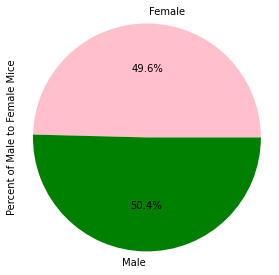

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_cleaned.groupby('Sex')['Mouse ID'].nunique().plot(kind = 'pie',  autopct='%1.1f%%',figsize=(4.5,4.5), ylabel = 'Percent of Male to Female Mice', 
                                                     colors = ['Pink', 'Green'])
plt.axis('equal');



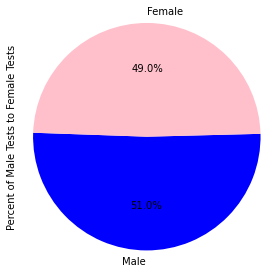

In [12]:
df_cleaned['Sex'].value_counts().plot(kind = 'pie',  autopct='%1.1f%%',figsize=(4.5,4.5), ylabel = 'Percent of Male Tests to Female Tests', 
                                      colors = ['Blue', 'Pink'], startangle =178)
plt.axis('equal');

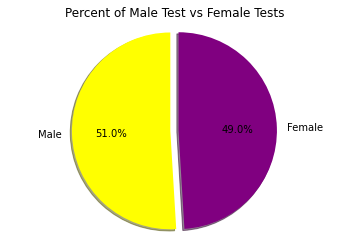

In [13]:
fig, ax = plt.subplots()
sex = ['Male', 'Female']
sex_count = df_cleaned['Sex'].value_counts()
colors = ['Yellow', 'Purple']
explode = (0.1,0.0)
plt.pie(sex_count,explode=explode,labels=sex,colors=colors,autopct='%1.1f%%', radius=1.2, startangle=90, shadow = True)
ax.set_title("Percent of Male Test vs Female Tests")
plt.axis('equal');

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_four = df_cleaned[df_cleaned['Drug Regimen'].isin(['Capomulin', 'Ramicane','Infubinol', 'Ceftamin'])]


# Start by getting the last (greatest) timepoint for each mouse
final_times = pd.DataFrame({'Timepoint':final_four.groupby('Mouse ID')['Timepoint'].max()})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor = pd.merge(final_times, final_four, how ='left',on = ['Mouse ID','Timepoint'])
display(tumor)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [139]:
treatment = list(tumor['Drug Regimen'].unique())

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]
# Calculate the IQR and quantitatively of Infubinol determine if there are any potential outliers

#for loop that uses my list of drugs in the treatment varible 
for drugs in treatment:
    #loops through my tumor dataframe created above to return the tumor volume corosponding to the name in the list of 
    #treatments above and stor it in tumor_data variable
    tumor_data = tumor[tumor['Drug Regimen'] ==drugs]['Tumor Volume (mm3)']
    #appends my tumor_volume list to store the final tumor sizes for each tumor of corrosponding drug
    tumor_vol.append(tumor_data)
    
    # code to calculate the quartiles of my tumor dataframe
    quartile_data = tumor_data.quantile([0.25, 0.5, 0.75])
    # Finding the lower quartile using the quartile_data varible above
    lower_quartile = quartile_data[0.25]
    # finding the upp quartile
    upper_quartile = quartile_data[0.75]
    # Calculating the IQR
    inter_quartile_range = upper_quartile - lower_quartile
    #Calculating lower bound
    lower_bound = lower_quartile - (1.5*inter_quartile_range)
    # calculating upper bound
    upper_bound = upper_quartile + (1.5*inter_quartile_range)
    
    #Prints the drugs name befor looping to the next name in list
    print(drugs)
    # prints string with data before moving to next drug
    print(f" Lower Quartile of {drugs} Final Tumor Volume: {lower_quartile.round(4)} (mm3)")
    print(f" Upper Quartile of {drugs} Final Tumor Volume is: {upper_quartile.round(4)} (mm3)")
    print(f" Interquartile range of last recorded tumor volume is: {inter_quartile_range.round(4)} (mm3)")
    print(f" Median range of last recorded tumor volume is: {quartile_data[.5].round(4)} (mm3)")
    print(f" Values below {lower_bound.round(4)} (mm3) would be outliers.")
    print(f" Values above {upper_bound.round(4)} (mm3) would also be outliers.")
    print('')
    print('')

Infubinol
 Lower Quartile of Infubinol Final Tumor Volume: 54.0486 (mm3)
 Upper Quartile of Infubinol Final Tumor Volume is: 65.5257 (mm3)
 Interquartile range of last recorded tumor volume is: 11.4771 (mm3)
 Median range of last recorded tumor volume is: 60.1652 (mm3)
 Values below 36.8329 (mm3) would be outliers.
 Values above 82.7414 (mm3) would also be outliers.


Ceftamin
 Lower Quartile of Ceftamin Final Tumor Volume: 48.7221 (mm3)
 Upper Quartile of Ceftamin Final Tumor Volume is: 64.2998 (mm3)
 Interquartile range of last recorded tumor volume is: 15.5778 (mm3)
 Median range of last recorded tumor volume is: 59.852 (mm3)
 Values below 25.3554 (mm3) would be outliers.
 Values above 87.6665 (mm3) would also be outliers.


Ramicane
 Lower Quartile of Ramicane Final Tumor Volume: 31.5605 (mm3)
 Upper Quartile of Ramicane Final Tumor Volume is: 40.659 (mm3)
 Interquartile range of last recorded tumor volume is: 9.0985 (mm3)
 Median range of last recorded tumor volume is: 36.5617 (mm

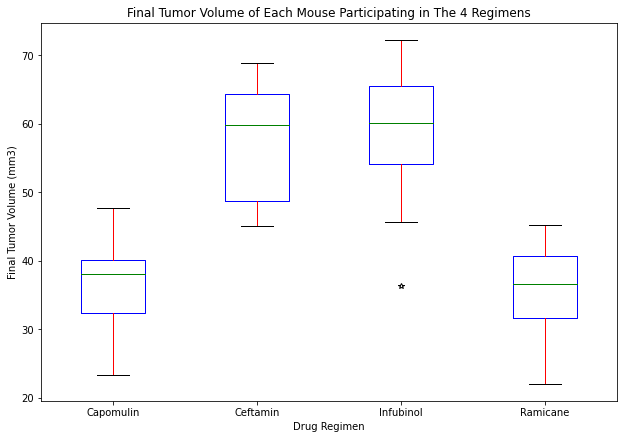

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Defining what colors I want for the features of th boxplot to be used later in code
color = {
    "boxes": "blue",
    "whiskers": "red",
    "medians": 'green',
    "caps": "black"}
# Ploting box ploot using the pandas method
tumor.boxplot(column= 'Tumor Volume (mm3)', by = 'Drug Regimen',  grid = False, color = color, sym = '*',figsize = (10,7))
# Pandas automatically creates a cringy title so I used suptitle() function to remove it
plt.suptitle("")
#label Y axis
plt.ylabel('Final Tumor Volume (mm3)')
# create new title
plt.title('Final Tumor Volume of Each Mouse Participating in The 4 Regimens');

## Line and Scatter Plots

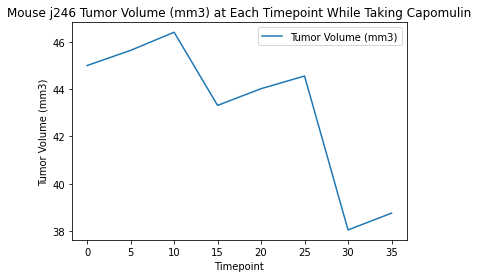

In [104]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create new data frame for just capomulin users
cap = tumor[tumor['Drug Regimen'] == 'Capomulin']
#created a new dataframe after picking one mouse using capomulin
mouse_cap = df_cleaned[df_cleaned['Mouse ID']== 'j246']
#plotting the line of that mouses tumor volume over all its time points
mouse_cap.plot.line(x='Timepoint', y= 'Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse j246 Tumor Volume (mm3) at Each Timepoint While Taking Capomulin');

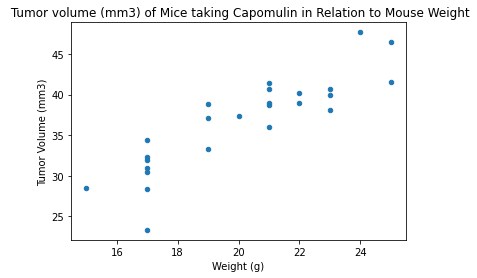

In [134]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#using he cap dataframe created above to plot weight by tumor volume using pandas method
cap.plot.scatter(x = 'Weight (g)', y= 'Tumor Volume (mm3)')
# pandas method alread filled in x and y label for me so all I needed to do was make a title
plt.title(' Tumor volume (mm3) of Mice taking Capomulin in Relation to Mouse Weight');

## Correlation and Regression

In [125]:
# Calculating linear regression and assigning a variable for each output of the function
slope,intercept,rvalue,pvalue,stderr = st.linregress(x = cap['Weight (g)'], y= cap['Tumor Volume (mm3)'])
# calculating coefficient
correlation = st.pearsonr(x = cap['Weight (g)'], y= cap['Tumor Volume (mm3)'])
# Print my results in a string fr readers
print(f'The Linear Regression Model for The Above Chart is y={round(slope,2)}(x)+{round(intercept,2)}')
print(f'The Linear Correlation Coefficient for The Above Chart is {correlation}')

The Linear Regression Model for The Above Chart is y=1.75(x)+1.45
The Linear Correlation Coefficient for The Above Chart is (0.8767060403658113, 9.08442908867363e-09)


(0.8767060403658113, 9.08442908867363e-09)

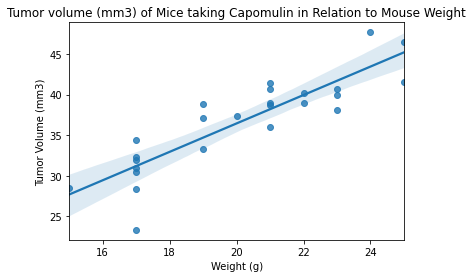

In [132]:
#Cool graph I learned awhile back from a different 
sns.regplot(x= cap['Weight (g)'], y=cap['Tumor Volume (mm3)'])
plt.title('Tumor volume (mm3) of Mice taking Capomulin in Relation to Mouse Weight');